# Sommartävling! Kan din prognosmodell användas för att identifiera avvikelser bättre än K2?

Delta i vår sommartävling och hjälp branschen att utveckla bättre och mer träffsäkra metoder för att identifiera avvikelser.

Du kan vinna ett presentkort på Naturkompaniet för 2000 kr

## Hur fungerar K2 algoritmen och hur kan vi ta fram en bättre avvikelsedetektering?
Avvikelsedetektering i K2 görs i nuläget med en så kallad segmented regression modell (utförligt beskriven här om man är intresserad: https://kyso.io/smartenergi/k2_regression_dsportalen?team=smartenergi). Energikonsumtion som en funktion av utomhustemperatur modelleras som 4 sammankopplade räta linjer inom de fördefinierade temperaturintervallen -5 &deg;C till 2 &deg;C, 2 &deg;C till 9 &deg;C, 9 &deg;C till 15 &deg;C, samt från 15 &deg;C till 20 &deg;C. Modellen byggs på en referensperiod som manuellt måste väljas för varje mätstation för en tidsperiod (vanligtvis ett år) som anses representativ för mätstationen. En avvikelse definieras därefter för mätpunkter som avviker mer än 2.2 gånger standardavvikelsen för residualen mellan uppmätt och beräknat värde för referensperioden för temperaturintervallet mätpunkten faller inom. Avvikelsedetekteringen fångar upp avvikande punkter bra i nuläget men det största problemet är det manuella valet av referensperiod. Det är därför av stort intresse att hitta en metod som fungerar utan referensperiod. Man skulle istället för referensperiod kunna använda till exempel senaste årets mätpunkter för att beräkna K2 modellen, problemet då kan vara om det senaste året innehöll många avvikande mätpunkter eller har en effektsignatur som är väldigt olik nuvarande år, detta skulle leda till en stor mängd felaktigt rapporterade avvikelser. En bättre lösning skulle vara att istället bygga en modell som är mindre känslig för avvikande datapunkter i historisk data.

En avvikelse definieras som en datapunkt som avviker alltför mycket från förväntat värde enligt vad vi kan förklara med hjälp av data. I nuläget används endast utomhustemperatur som förklarande variabel men tänk om vi kunde förklara en större del av variationen i data med hjälp av fler variabler? Detta borde leda till en bättre och mer träffsäker avvikelsedetektering. En möjlig förbättringsväg kan vara att förklara energikonsumtion baserat på historisk data med en så kallad prognosmodell. Energibolag använder i dagsläget redan prognosmodeller både för produktionsplanering för att på kort sikt ta fram en förväntad energiförbrukning givet bland annat väderprognosen för de kommande dagarna men också för budgeteringssyfte där prognos görs för ett år framöver, även detta beroende på en uppskattning av utomhustemperaturen. Dessa prognosmodeller skulle möjligtvis även kunna användas för avvikelsedetektering.

Andra variabler som kan tänkas förklara energikonsumtionen i kombination med rätt modell är andra vädervariabler utöver utomhustemperaturen.

## Utmaningen
Utmaningen är att bygga en eller flera modeller som kan prognostisera energikonsumtionen för 10 mätstationer för perioden 2017-01-01 till och med 2017-06-26. Som förslag har vi att bygga en prognosmodell med vädervariabler men självklart får du finna andra lösningar på problemet. Vinnaren av tävlingen är den som lyckas få lägst genomsnittligt RMSE/RMSD för valideringsperioden för de 10 mätstationerna. Byggs flera modeller, alltså en per station, behöver det göras på ett automatiserat sätt så att varje modell inte kräver manuell justering, detta för att vi vill hitta modeller som automatiskt kan användas till en stor mängd mätstationer som kräver så lite manuellt inflytande som möjligt.

RMSD beräknas enligt
$$RMSD = \sqrt{\frac{\sum_{i=0}^n (\hat{y}_i-y_i)^2}{n}}$$
där $\hat{y}_i$ är prognostiserat värde för tidpunkt i och $y_i$ observerat värde för samma tidpunkt för alla tidpunkter n.

## Dataset
Dataset för tävlingen består av 10 csv filer, Station_1.csv till Station_10.csv, en för varje mätstation.
Data hittar du här: LÄNK
Varje fil innehåller följande variabler:
* Datum - Datum för Konsumtion och väder mätning. 2013-01-01 till och med 2016-12-31.
* Konsumtion - Total energikonsumtion (kWh) för Datum.
* Temperatur - Genomsnittlig utomhustemperatur i Celsius för Datum.
* Nederbördsmängd - Total nederbördsmängd för Datum uppmätt i mm.
* Vindriktning - Genomsnittlig vindriktning i grader för Datum.
* Vindhastighet - Genomsnittlig vindhastighet (m/s) för Datum.
* Lufttryck - Genomsnittligt lufttryck (Pascal) för Datum omräknat till ett värde som representerar trycket vid havsytans nivå.
* Daggpunktstemperatur - Genomsnittlig daggpunktstemperatur för Datum. Daggpunkten är ett mått på hur mycket vattenånga atmosfären innehåller. Om temperaturen sjunker till daggpunkten blir luften mättad med vattenånga och den relativa luftfuktigheten blir 100 %. Från mätningar av temperatur och relativ fuktighet beräknas daggpunkten.
* K2_regression - Prognos av energikonsumtion beräknad med K2s segmented regression modell. Referensperiod för alla 10 dataset var 2014-01-01 till och med 2014-12-31. Detta kan användas för att se om din modell ser ut att prestera bättre än nuvarande modell i K2.

All väderdata är nedladdat från SMHI (https://www.smhi.se/data/meteorologi/ladda-ner-meteorologiska-observationer#param=airtemperatureInstant,stations=all).
Energikonsumtionen har normaliserats till samma skala för alla stationer för att en genomsnittlig beräkning av RMSD ska vara möjlig. Detta gjordes genom att skala energikonsumtion med K2 prognostiserat värde vid -5 &deg;C. Utan denna normalisering domineras genomsnittliga RMSD av stationer med högre energikonsumtion.
Valideringsperioden 2017-01-01 till och med 2017-06-26 är exkluderad från tillhandahållen data för att minska risken för övertränade modeller. Valideringsdata kommer offentliggöras efter tävlingens avlsut 1 september. 

## Inlämning av svar
För att vara med i tävlingen behöver du skicka in ditt svar till ida.lundholm-benzi@ferrologic.se senast 1 september. Svaret ska bestå av en beskrivning av metoden och resultatet samt en csv fil per mätstation innehållande prognostiserad energikonsumtion för valideringsperioden 2017-01-01 till och med 2017-06-26. Beskrivning av metod och redovisning av resultat görs lämpligen i Jupyter notebook med analys i R eller Python, detta så att svaret kan publiceras på DS portalen efter tävlingen avslutats. Vädervariablerna för valideringsdata finns i en separat fil (LÄNK) så du behöver inte prognostisera dem.

## Frågor?
Har du några som helst frågor eller funderingar kring tävlingen så kontakta Ida på ida.lundholm-benzi@ferrologic.se
Sommartävlingen presenteras på DS lunchseminare 23 juni, 12:15. En inspelning av presentationen kommer finnas tillgänglig efteråt.

Lycka till!









# Analytical Challenge: Who can do the best prognosis on district heating data?

Description of problem

Many Energy companies perform forecasts on the energy usage of their customers in order to forsee coming changes in demand. Space heating is one of the main components of energy usage which is highly dependent on out door temperature, also ventilation is dependent on out door temperature. In a country with strong seasons like sweden we therefore see a strong relationship between season and energy consumption. Weather forecasts can be used for a short term forecast of energy consumption. 
Warm water usage instead has little correlation with outdoor temperature and tend to be more stable when looking at daily averages.

A
It is easier to build individual models for individual district heating substations 
Vad använder energiföretagen prognoser till idag? budgetering? Vilken tidshorisont är intressant? energi och flöde? Bygger man modeller på enskilda stationer eller flera?

Intressant att inom Brava få insyn kring hur olika företag arbetar med prognoser, dela kunskap

The data and where to find it

## The analytical challenge
The data provided includes daily energy consumption as well as the daily average outdoor temperature for X test substations. The challenge is to build a forecast model for the substations that predict energy consumption 30 days forward in time. The data provided contains energy consumption until XXXdateXXX but the results will be evaluated on the date range XXXdateXXX + 30 days, data not shared with competitors until the challenge is over. The prediction with the lowest rmse (?) for the 30 day period wins.

The answer of this analytical challenge should be uploaded as a notebook to the Data Science portal describing the method and results. Preferbly you will use Python or R or any language that can run i Jupyter Notebook to solve this problem. Accompaning the notebook a csv file with the forecasted energy consumption data for the dates xx-yy shall be sent to ida.lundholm-benzi@ferrologic.se for evaluation. The winner of the challenge will be revealed the date and apart of the glory be awarded with ???.


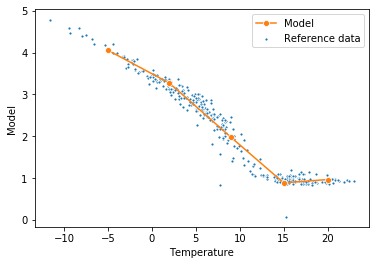